In [11]:
import numpy as np
input_data = np.array([2,3])
weights = {'node_0': np.array([1,1]),
          'node_1': np.array([-1,1]),
          'output': np.array([2, -1])}

In [3]:
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

In [5]:
hidden_layer_values = np.array([node_0_value, node_1_value])
print(hidden_layer_values)

[5 1]


In [7]:
output = (hidden_layer_values * weights ['output']).sum()
print(output)

9


In [8]:
node_0_value = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_value)

node_1_value = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_value)

In [9]:
hidden_layer_values = np.array([node_0_output, node_1_output])
print(hidden_layer_values)

[0.9999092  0.76159416]


In [10]:
output = (hidden_layer_values * weights ['output']).sum()
print(output)

1.2382242525694254


In [11]:
weights = np.array([1,2])
input_data = np.array([3,4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()

error = preds - target
print(error)

5


In [12]:
gradient = 2 * input_data * error
gradient

array([30, 40])

In [13]:
weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()

error_updated = preds_updated - target

print(error_updated)

2.5


In [3]:
from keras.layers import Dense
from keras.models import Sequential

#predictors = np.loadtxt('predictors_data.csv', delimiter= ',')

In [5]:
#model = Sequential()
#model.add(Dense(100, activation ='Relu'))

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')
#model.fit(predictors,target)

In [7]:
import tensorflow as tf
hello = tf.constant('Hello, Tensorflow!')
#sess = tf.Session()
#print(sess.run(hello))

In [8]:
print(tf.reduce_sum(tf.random.normal([1000,1000])))

tf.Tensor(429.0015, shape=(), dtype=float32)


In [16]:
#print("Tensorflow version is ")

In [9]:
from keras import backend as kbe

In [12]:
data = kbe.variable(np.random.random((4,2)))
zero_data = kbe.zeros_like(data)               # create 4 X 2 tensor of zeros
print(kbe.eval(zero_data))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [13]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

In [22]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

In [16]:
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

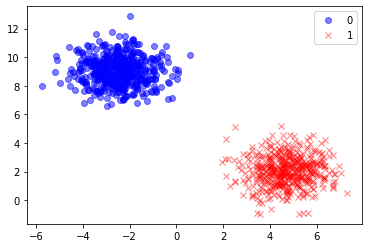

In [17]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

pl = plot_data(plt, X, y)
pl.show()

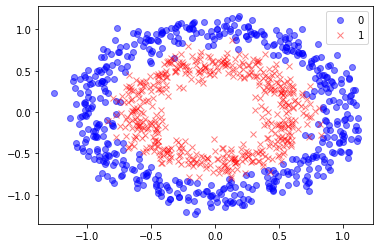

In [18]:
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)

pl = plot_data(plt, X, y)
pl.show()

Epoch 1/100
700/700 [==============================] - 0s 227us/step - loss: 0.7309 - accuracy: 0.4900
Epoch 2/100
700/700 [==============================] - 0s 82us/step - loss: 0.6953 - accuracy: 0.5357
Epoch 3/100
700/700 [==============================] - 0s 111us/step - loss: 0.6975 - accuracy: 0.5371
Epoch 4/100
700/700 [==============================] - 0s 95us/step - loss: 0.6945 - accuracy: 0.5514
Epoch 5/100
700/700 [==============================] - 0s 67us/step - loss: 0.6960 - accuracy: 0.4286
Epoch 6/100
700/700 [==============================] - 0s 113us/step - loss: 0.6960 - accuracy: 0.5214
Epoch 7/100
700/700 [==============================] - 0s 122us/step - loss: 0.6962 - accuracy: 0.5429
Epoch 8/100
700/700 [==============================] - 0s 117us/step - loss: 0.6968 - accuracy: 0.4829
Epoch 9/100
700/700 [==============================] - 0s 114us/step - loss: 0.6947 - accuracy: 0.4357
Epoch 10/100
700/700 [==============================] - 0s 83us/step - loss:

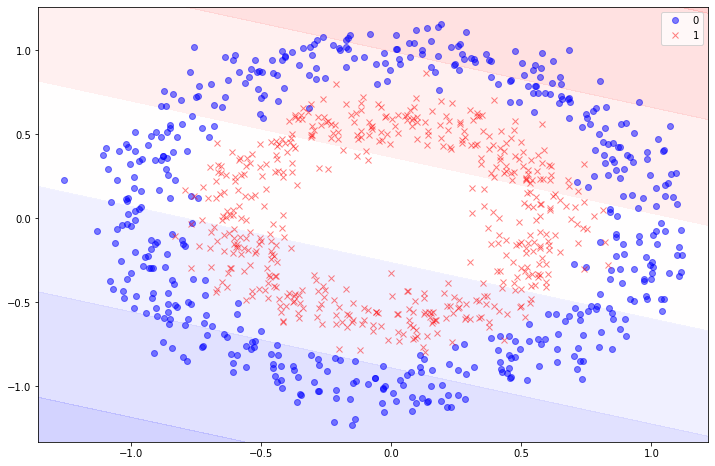

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#   Simple Sequential model
model = Sequential()
model.add(Dense(1, activation="sigmoid", name="output_layer"))

#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
 
model.fit(X_train, y_train, epochs=100, verbose=1)
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import *

Epoch 1/100
700/700 [==============================] - 0s 233us/step - loss: 0.3620 - accuracy: 0.8557
Epoch 2/100
700/700 [==============================] - 0s 65us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 3/100
700/700 [==============================] - 0s 67us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 4/100
700/700 [==============================] - 0s 64us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 5/100
700/700 [==============================] - 0s 59us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 6/100
700/700 [==============================] - 0s 54us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 7/100
700/700 [==============================] - 0s 60us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8/100
700/700 [==============================] - 0s 51us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9/100
700/700 [==============================] - 0s 64us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 10/100
700/700 [==============================] - 0s 67us/step - loss: 0.00

700/700 [==============================] - 0s 87us/step - loss: 2.2197e-04 - accuracy: 1.0000
Epoch 79/100
700/700 [==============================] - 0s 71us/step - loss: 2.1798e-04 - accuracy: 1.0000
Epoch 80/100
700/700 [==============================] - 0s 66us/step - loss: 2.1372e-04 - accuracy: 1.0000
Epoch 81/100
700/700 [==============================] - 0s 69us/step - loss: 2.1025e-04 - accuracy: 1.0000
Epoch 82/100
700/700 [==============================] - 0s 75us/step - loss: 2.0617e-04 - accuracy: 1.0000
Epoch 83/100
700/700 [==============================] - 0s 76us/step - loss: 2.0210e-04 - accuracy: 1.0000
Epoch 84/100
700/700 [==============================] - 0s 69us/step - loss: 1.9887e-04 - accuracy: 1.0000
Epoch 85/100
700/700 [==============================] - 0s 60us/step - loss: 1.9475e-04 - accuracy: 1.0000
Epoch 86/100
700/700 [==============================] - 0s 68us/step - loss: 1.9132e-04 - accuracy: 1.0000
Epoch 87/100
700/700 [============================

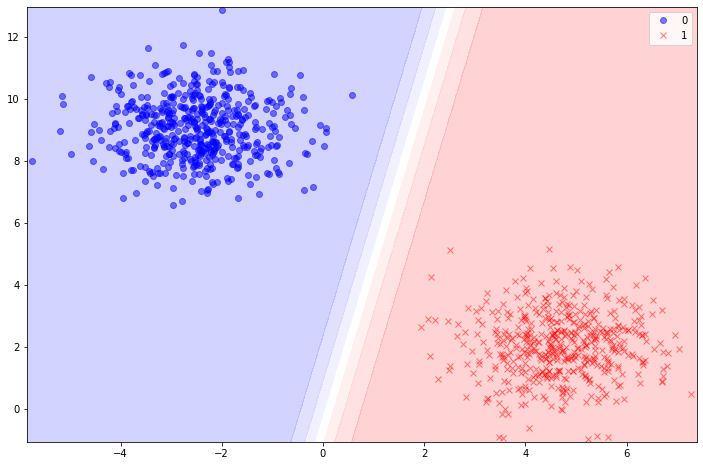

In [26]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
#   Fit the model with the data from make_blobs.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages 
model.fit(X_train, y_train, epochs=100, verbose=1)
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()


In [ ]:
model = keras.models.sequential()
model.add(Dense(32, input_dim=9))
model.add(Dense(128))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

training_data_df = pd.read_csv("sales_data_training.csv")
test_data_df = pd.read_csv("sales_data_test.csv")

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training = scaler.fit_transform(training_data_df)
scaled_testing = scaler.transform(test_data_df)
print("Note: total_earnings values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[8], scaler.min_[8]))

scaled_training_df = pd.DataFrame(scaled_training, columns=training_data_df.columns.values)
scaled_testing_df = pd.DataFrame(scaled_testing, columns=test_data_df.columns.values)

scaled_training_df.to_csv("sales_data_training_scaled.csv", index=False)
scaled_testing_df.to_csv("sales_data_testing_scaled.csv", index=False)

Note: total_earnings values were scaled by multiplying by 0.0000036968 and adding -0.115913


In [5]:
import pandas as pd
from keras.models import Sequential
from keras.layers import *

training_data_df = pd.read_csv("sales_data_training_scaled.csv")

X = training_data_df.drop('total_earnings', axis=1).values
Y = training_data_df[['total_earnings']].values

model = Sequential()
model.add(Dense(50, input_dim=9, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam")

Using TensorFlow backend.


In [7]:
model.fit(
    X,
    Y,
    epochs=50,
    shuffle=True,
    verbose=2
)
test_data_df = pd.read_csv("sales_data_test_scaled.csv")

X_test = test_data_df.drop('total_earnings', axis=1).values
Y_test = test_data_df[['total_earnings']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))



Epoch 1/50
 - 0s - loss: 4.6115e-05
Epoch 2/50
 - 0s - loss: 6.3439e-05
Epoch 3/50
 - 0s - loss: 5.1441e-05
Epoch 4/50
 - 0s - loss: 2.5557e-05
Epoch 5/50
 - 0s - loss: 3.9256e-05
Epoch 6/50
 - 0s - loss: 4.2490e-05
Epoch 7/50
 - 0s - loss: 3.9796e-05
Epoch 8/50
 - 0s - loss: 6.0696e-05
Epoch 9/50
 - 0s - loss: 8.8340e-05
Epoch 10/50
 - 0s - loss: 4.3556e-05
Epoch 11/50
 - 0s - loss: 5.8894e-05
Epoch 12/50
 - 0s - loss: 4.1120e-05
Epoch 13/50
 - 0s - loss: 3.5282e-05
Epoch 14/50
 - 0s - loss: 5.4348e-05
Epoch 15/50
 - 0s - loss: 5.7140e-05
Epoch 16/50
 - 0s - loss: 9.6703e-05
Epoch 17/50
 - 0s - loss: 4.7779e-05
Epoch 18/50
 - 0s - loss: 2.7432e-05
Epoch 19/50
 - 0s - loss: 2.2837e-05
Epoch 20/50
 - 0s - loss: 4.2471e-05
Epoch 21/50
 - 0s - loss: 6.2395e-05
Epoch 22/50
 - 0s - loss: 4.3347e-05
Epoch 23/50
 - 0s - loss: 3.1459e-05
Epoch 24/50
 - 0s - loss: 2.3728e-05
Epoch 25/50
 - 0s - loss: 2.6276e-05
Epoch 26/50
 - 0s - loss: 2.8031e-05
Epoch 27/50
 - 0s - loss: 3.5787e-05
Epoch 28/5

In [9]:
X = pd.read_csv("proposed_new_product.csv").values

prediction = model.predict(X)

# Grab just the first element of the first prediction (since that's the only have one)
prediction = prediction[0][0]

# Re-scale the data from the 0-to-1 range back to dollars
# These constants are from when the data was originally scaled down to the 0-to-1 range
prediction = prediction + 0.1159
prediction = prediction / 0.0000036968

print("Earnings Prediction for Proposed Product - ${}".format(prediction))

Earnings Prediction for Proposed Product - $265037.6015786768


In [10]:
model.save("trained_model.h5")
print("Model saved to disk.")


Model saved to disk.


In [11]:
import pandas as pd
from keras.models import load_model

model = load_model('trained_model.h5')

X = pd.read_csv("proposed_new_product.csv").values
prediction = model.predict(X)

# Grab just the first element of the first prediction (since we only have one)
prediction = prediction[0][0]

# Re-scale the data from the 0-to-1 range back to dollars
# These constants are from when the data was originally scaled down to the 0-to-1 range
prediction = prediction + 0.1159
prediction = prediction / 0.0000036968

print("Earnings Prediction for Proposed Product - ${}".format(prediction))


Earnings Prediction for Proposed Product - $265037.6015786768


In [17]:
import numpy as np
from keras.preprocessing import image
from keras.applications import resnet50

# Load Keras' ResNet50 model that was pre-trained against the ImageNet database
#model = resnet50.ResNet50()

# Load the image file, resizing it to 224x224 pixels (required by this model)
#img = image.load_img("bay.jpg", target_size=(224, 224))

# Convert the image to a numpy array
#x = image.img_to_array(img)

# Add a forth dimension since Keras expects a list of images
#x = np.expand_dims(x, axis=0)

# Scale the input image to the range used in the trained network
#x = resnet50.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
#predictions = model.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
#predicted_classes = resnet50.decode_predictions(predictions, top=9)

#print("This is an image of:")

#for imagenet_id, name, likelihood in predicted_classes[0]:
#print(" - {}: {:2f} likelihood".format(name, likelihood))


In [16]:
model = Sequential()
model.add(Dense(50, input_dim=9, activation='relu', name='layer_1'))
model.add(Dense(100, activation='relu', name='layer_2'))
model.add(Dense(50, activation='relu', name='layer_3'))
model.add(Dense(1, activation='linear', name='output_layer'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Create a TensorBoard logger
#logger = keras.callbacks.TensorBoard(
    log_dir='logs',
    write_graph=True,
    histogram_freq=5
)
model.fit(
    X,
    Y,
    epochs=50,
    shuffle=True,
    verbose=2,
    callbacks=[logger]
)

NameError: name 'keras' is not defined